In [5]:
!wget 'https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os


In [8]:
tf.__version__

'2.20.0'

In [ ]:
img_height, img_width = 32, 32
batch_size = 20
fruits_data_dir = r"C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\FruitClassification\fruits"
train_dir = os.path.join(fruits_data_dir, "train")
test_dir = os.path.join(fruits_data_dir, "test")
val_dir = os.path.join(fruits_data_dir, "validation")

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                       image_size= (img_height, img_width),
                                                       batch_size = batch_size)
val_ds =  tf.keras.utils.image_dataset_from_directory(val_dir,
                                                      image_size= (img_height, img_width),
                                                      batch_size = batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                      image_size = (img_height, img_width),
                                                      batch_size = batch_size)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


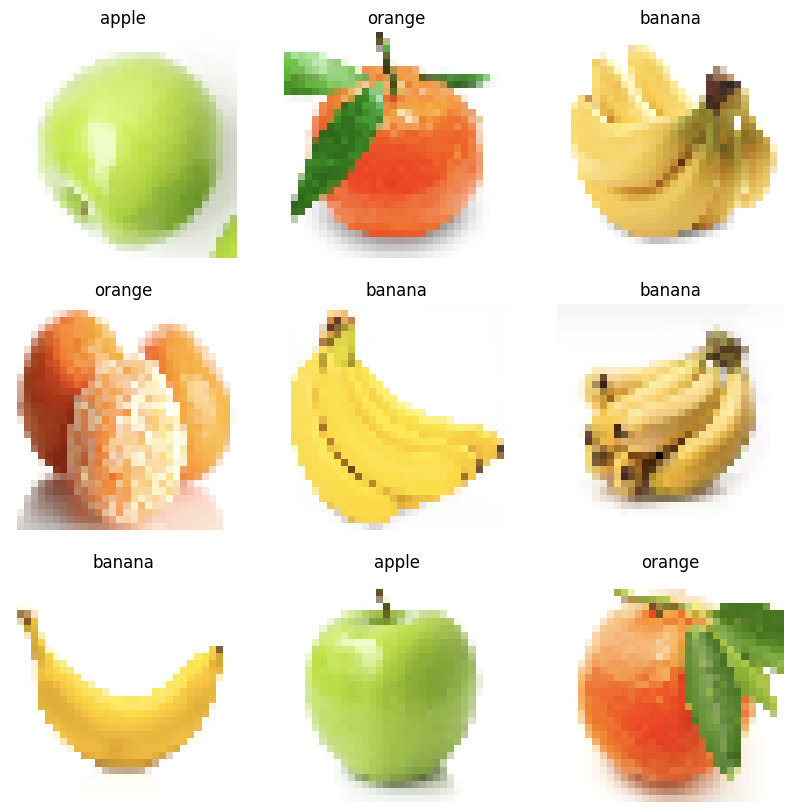

In [27]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    
    ax=plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")




In [31]:
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Conv2D(32, 3, activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(64, 3, activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(128, 3, activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="softmax"),
            tf.keras.layers.Dense(3)
         ]
    )

In [32]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [33]:
model.fit(train_ds,
          validation_data = val_ds,
          epochs = 20 
          )

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3239 - loss: 1.0989 - val_accuracy: 0.3485 - val_loss: 1.0977
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4109 - loss: 1.0948 - val_accuracy: 0.4091 - val_loss: 1.0651
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5043 - loss: 1.0470 - val_accuracy: 0.5758 - val_loss: 1.0200
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5543 - loss: 1.0041 - val_accuracy: 0.5455 - val_loss: 0.9745
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6022 - loss: 0.9721 - val_accuracy: 0.5303 - val_loss: 0.9644
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6217 - loss: 0.9509 - val_accuracy: 0.5455 - val_loss: 0.9392
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6391 - loss: 0.9302 - val_accuracy: 0.8030 - val_loss: 0.9031
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7283 - loss: 0.9090 - val_accuracy: 0.6364 - v

In [35]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9154 - loss: 0.6169 


[0.6169441938400269, 0.9153845906257629]

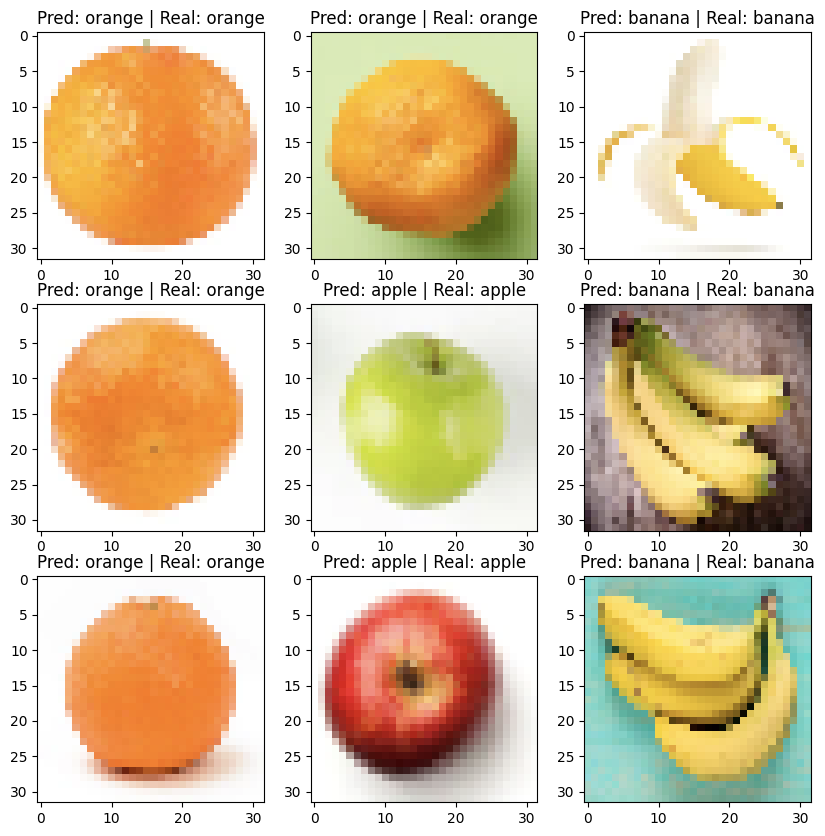

In [39]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications = model(images)
    
    for i in range(9):
        ax = plt.subplot(3, 3, i+1 )
        plt.imshow(images[i].numpy().astype("uint8"))
        index = numpy.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [40]:
convertor = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convertor.convert()

with open("model.tflite", 'wb')  as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\swapn\AppData\Local\Temp\tmpy1o2x9vd\assets


INFO:tensorflow:Assets written to: C:\Users\swapn\AppData\Local\Temp\tmpy1o2x9vd\assets


Saved artifact at 'C:\Users\swapn\AppData\Local\Temp\tmpy1o2x9vd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1911561520912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561521104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911560976720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561520720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561522448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561523216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561523600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561523984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561524176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1911561524368: TensorSpec(shape=(), dtype=tf.resource, name=None)
